**Question 1: Consensus clustering**

**a) What is consensus clustering? Mention 2 applications of consensus clustering.**




*   Consensus Clustering (Also known as clustering aggregation or clustering ensembles)  is an algorithmic technique in which a number of different (input) clusterings have been obtained for a particular dataset and the objective is to find a single (consensus) clustering which is a better fit as compared to the existing clusterings. It is thus the problem of reconsiling clustering information about the same dataset coming from different sources or from different runs of the same algorithm.It yields a stable and robust final clustering that is in aggrement with the multiple clusterings. 

*   Let us have a given set of n data points as X = {x1, x2,.....,xn}, and a set of k clusterings C = {C1, C2,....Ck} of the data points in X. Each clustering Ci is a mapping from X to {1,...,TCi}, TCi is the number of points in cluster Ci. The problem of consensus clustering is to find a new cluster C* of the data X such that it best summarizes the clustering ensemble C. 

**Applications of consensus clustering are as follows:**

1. Consensus clustering is used in scenario where there is a very high dimensional data. It thus helps in reducing the number of features from the high-dimensional dataset by pre-filtering the features and then applying the consensus algorithm to select the best features appropriately. 

2. Since it uses the clustering results from various clusterings, it helps to mine the pattern that is statistically stable across the various runs of the clustering algorithms even if the sample varies slighly in each run. In other words, it discovers the robustness of the discovered clusters to sampling variability. 


**b) Define consensus matrix in your own words with the help of the formula.**


Consensus matrix is a matrix based on the cooccurrence of vertices in clusters of the input partitions.It is an (N × N ) matrix that stores, for each pair of data items, the ratio of the number of times for which both the items got clustered together to the number of times both the items were selected in the sampling, for all the runs. It is then averaged over the connectivity matrices of every perturbed dataset to create the consensus matrix.

It provides for a similarity measure that can be used in conjunction with an agglomerative hierarchical tree construction algorithm to yield a dendogram of item adjacencies.

The mathematical representation of the consensus matrix is as follows:

Let us assume that D(1) , D(2) , . . . , D(H) be the list of H perturbed datasets obtained by resampling the original
dataset D. Also, let M(h) denote the (N × N ) connectivity matrix corresponding to dataset
D(h). The entries of this matrix are defined as follows:

M(h)(i,j)  = 1, if items i and j belong to the same cluster.
           = 0, if they belong to different clusters.

Let I(h) be the (N × N ) indicator matrix such that its (i, j)-th entry is equal to 1 if both items i and j are present in the dataset D (h) , and 0 otherwise.

The consensus matrix M can then be defined as a properly normalized sum of the
connectivity matrices of all the perturbed datasets {D (h) : h = 1, 2, . . . , H }:

Mat(i, j) = (M (h) (i, j) for all h) / (I(h) (i, j) for all h)

**c) Mention pros and cons of consensus clustering.**


**Pros of Consensus Clustering:**

*   It helps to identify the statistically stable clusters ingoring the slight data variability.

*   It acts as a good measure to prescribe the number of clusters to be taken for various clustering schemes that require taking prior number of clusters.

*   It helps in identifying the outliers and the representatives clusters for further clustering analysis of a high-dimensional dataset.

**Cons of Consensus Clustering:**

*   It involves a good amount of computational overhead as compared to the traditional clustering schemes because of its consensus technique.

*   Since it is distance-based, it requires efficient feature engineering in case of a high-dimensional dataset.


**d) Fill in the gaps for the pseudocode of the consensus clustering. Pseudocode provided in the assignment.**



The blanks are filled up as follows

*  **belonging to all the items of K**

*   M is the set of connectivity maatrices which is initially empty.

*   D is the generic dataset and D(h) is the dataset obtained by resampling D 

*   **K** clusters

*   **Mat(K)** which is the consensus matrix for a specified k

*   **D , Mat(K)**

*    **Mat(K)**



**e) Perform (k-means) consensus clustering of samples for the given gene expression data . Take minimum clusters as 2, maximum clusters as 6, resampling proportion as 80% and number of iterations as 10. Find:**

In [ ]:
# Importing the necessary packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
np.random.seed(0)

Load the gene expression data

In [ ]:
# Mounting the Google Drive for accessing the Cleveland dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataUrl = "/content/drive/My Drive/Colab Notebooks/Data Files/allData.csv"
geneExpData = pd.read_csv(dataUrl)
print(geneExpData.head(5))

  Unnamed: 0  36638_at  39318_at  ...  32578_at  39383_at  33718_at
0      01005  0.583368  0.535258  ...  0.438651  0.395720  0.273593
1      01010  0.505321  0.704177  ...  0.584035  0.589994  0.401375
2      03002  0.375805  0.073716  ...  0.556874  0.931118  0.301529
3      04006  1.000000  0.226960  ...  0.670769  0.541601  0.659517
4      04007  0.890125  0.631314  ...  0.571348  0.425701  0.196066

[5 rows x 5001 columns]


In [ ]:
geneExpData = geneExpData.drop(['Unnamed: 0'], axis=1)

In [ ]:
# Converting the dataset into 2D array
geneExpData = geneExpData.to_numpy()

In [ ]:
!cp "/content/drive/My Drive/Colab Notebooks/consensusClustering.py" .

In [ ]:
# Importing the necessary packages for consensus clustering
import consensusClustering
from consensusClustering import ConsensusCluster

In [ ]:
# Performing consensus k-means clustering with the given parameters
cc = ConsensusCluster(KMeans,2,6,10,resample_proportion=0.8)

In [ ]:
# Fitting the data
c = cc.fit(geneExpData)

**i) Best number of clusters**

In [ ]:
print("The best number of clusters is " + str(c[1]))

The best number of clusters is 2


**ii) Change in area under CDF**

In [ ]:
print("Change in area under CDF is" + str(c[0]))

Change in area under CDF is[ 9.91589355e+00 -1.52611628e-03  3.77181738e-03]


**iii)Best cluster from the consensus matrix for each sample**

In [ ]:
cc.predict()

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

**Question 2. Read about bi-clustering and explain it in your own words. Give an example of an algorithm based on bi-clustering.**

Bi-clustering is a method in machine learning that allows selecting the area of interest in the Big data by selecting similar rows and columns which have similar features and cluster them together. The algorithm produces biclusters between rows and columns which produce the same behavior together. For example, finding the genes that are co-regulated in subset conditions  subgroups of genes and subgroups of conditions, where the genes exhibit highly correlated activities for every condition or we want to discover which of our patients have similar diseases.

Bi-clustering is one of the NP's complete problems; it is not an easy algorithm to solve as it is computationally expensive so there are several algorithms used as **Robust Biclustering Algorithm (RoBA**) which made up of three steps parts. The first is data conditioning  which clean data to get rid of the noise and to solve the problem of missing values. The second step is to decompose the data matrix A into elementary matrix . Lastly extracting any type of biclusters defined by the user as b-iclustering with constant values.

**Question 3. NMF Clustering**


**a) Explain Non-negative matrix factorization (NMF) in your own words.** 

NMF (Nonnegative Matrix Factorization)  is a matrix factorization method where we constrain the matrices to be nonnegative. If I have a matrix m*n which does not have any negative values in it and we want to factorize this matrix into two non-negative matrices W and H where W is N*K and H is M*K so to do that we must solve the minimization problem, we need to minimize the distance between X and W-H arg: min(w, H) cost (X-WH)subject to W, H > 0 where we want to minimize divergence between X and WH, but this problem is NP-Hard problem as it is convex in W or H but not in both so in this problem we cannot find the global minimum however finding a good local minimum can be satisfying and update done by Kim & Park, 2007 where the additionally enforce sparsity in W and H matrices where allow set of certain features specific to each other. NMF is distinguished from PCA and VQ by its use of nonnegativity constraints.

**b) Mention pros and cons of NMF**

**Pros of NMF:**

*  It represent data with non-negative features well ( it has non-negative constraint).

*  NMF doesn’t use the distance based measures.

*  Joint feature selection and clustering.

**Cons of NMF:**

*   Can only detect linearly separable clusters.

*   It is computationally taxing.

*   Different NMF algorithms find different factorizations and same NMF algorithm with different parameters may lead to different factorization

*   One requirement of NMF is that the values of data should be non-negative, while in many real-world problems the non-negative constraints cannot be satisfied.




**c) Mention an application of NMF**

*   Applications in image processing, text processing and mining, music transcription, video analysis, bioinformatics, chemistry. Image mining applications include data compression, finding similar images, cluster images.

*   In Text Mining application document-term matrix is constructed with the weights of various terms from a set of documents. This matrix is factorized into a term-feature and a feature-document matrix. The features are derived from the contents of the documents, and the feature-document matrix describes data clusters of related documents. Text mining applications include data compression,finding similar terms,finding similar documents,clustering documents,topic detection and tracking.

**d) Use the nimfa package for NMF clustering on gene expression data. Use the parameters (10 ranks, 50 maximum iterations and 25 runs) to compute the following:**

**i) From the average connectivity matrix across multiple runs compute consensus matrix**

In [ ]:
!pip install nimfa

     |████████████████████████████████| 4.7MB 7.6MB/s 


In [ ]:
# Importing relevant packages
import numpy as np
import nimfa
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.cluster.hierarchy as ch
import urllib

In [ ]:
dataUrlAll = "/content/drive/My Drive/Colab Notebooks/Data Files/allData.csv"
allData = pd.read_csv(dataUrlAll)
print(allData.head(5))

  Unnamed: 0  36638_at  39318_at  ...  32578_at  39383_at  33718_at
0      01005  0.583368  0.535258  ...  0.438651  0.395720  0.273593
1      01010  0.505321  0.704177  ...  0.584035  0.589994  0.401375
2      03002  0.375805  0.073716  ...  0.556874  0.931118  0.301529
3      04006  1.000000  0.226960  ...  0.670769  0.541601  0.659517
4      04007  0.890125  0.631314  ...  0.571348  0.425701  0.196066

[5 rows x 5001 columns]


In [ ]:
allData = allData.drop(['Unnamed: 0'], axis=1)

In [ ]:
# Converting the dataset into 2D array
allData = allData.to_numpy()

In [ ]:
# Performing the NMF clustering
nmf_clustering = nimfa.Nmf(allData,rank=10, max_iter=50, n_run=25)

In [ ]:
# Fitting the data
n = nmf_clustering()

**ii) Produce a heatmap with a dendogram from the clustering results you obtained**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


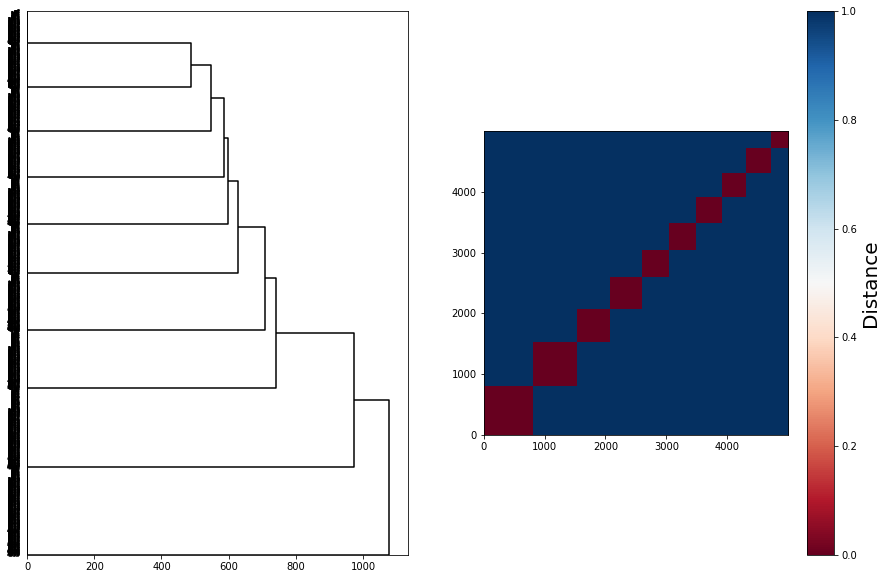

In [ ]:
fig = plt.figure(figsize=(15, 10))
heatmapGS = gridspec.GridSpec(1, 2)

C = 1 - n.fit.consensus()
Y = ch.linkage(C, method='ward')

denAX = fig.add_subplot(heatmapGS[0,0])
denD = ch.dendrogram(Y, orientation='right', link_color_func=lambda k: 'black')


heatmapAX = fig.add_subplot(heatmapGS[0,1])
D = C[denD['leaves'], :][:, denD['leaves']]
axi = heatmapAX.imshow(D, interpolation='nearest', aspect='equal', origin='lower', cmap='RdBu') 

cb = fig.colorbar(axi) 
cb.set_label('Distance', fontsize=20)